## INF1608 - Análise Numérica - 2016.1
## Departamento de Informática - PUC-Rio 
## Prof. Hélio Lopes - lopes@inf.puc-rio.br
## http://www.inf.puc-rio.br/~lopes



## Interpolação polinomial de pontos

Suponha que tenhamos uma amostra com $n$ valores, feitas em pontos distintos, de uma função desconhecida $f:R\to R$.
Isso quer dizer que temos os seguintes dados:

$$ f(x_1) = y_1$$
$$ f(x_2) = y_2$$
$$\vdots$$
$$ f(x_n) = y_n$$ 

Gostaria de encontrar uma função que interpolasse $f$. Uma opção seria criar um polinômio $p$ de grau $n-1$ que satisfaça $p(x_i) = y_i$, para $i = 1,\ldots,n$.

Considerando que 

$$p(x) = a_0 + a_1 x + a_2 x^2 + \cdot + a_{n-1} x^{n-1},$$

então temos que resolver o seguinte sistema de equações:

$$ a_0 + a_1 x_1 + a_2 x_1^2 + \cdot + a_{n-1} x_1^{n-1}  =  y_1 $$

$$
a_0 + a_1 x_2 + a_2 x_2^2 + \cdot + a_{n-1} x_2^{n-1}  =  y_2 
$$

$$
\vdots 
$$

$$
a_0 + a_1 x_n + a_2 x_n^2 + \cdot + a_{n-1} x_n^{n-1}  =  y_n
$$

Esse sistema pode ser re-escrito na seguinte forma matrical:

$
\left[ \begin{array}{cccc}
1 & x_1  & x_1^2 & \cdots & x_1^{n-1} \\ 
1 & x_2  & x_2^2 & \cdots & x_2^{n-1} \\ 
\vdots    & \vdots & \ddots & \vdots \\
1 & x_n  & x_n^2 & \cdots & x_n^{n-1} \\ 
\end{array} \right]
$
$
\left[ \begin{array}{c}
a_0  \\ 
a_1  \\ 
\vdots \\
a_{n-1} \\ 
\end{array} \right]
$
=
$
\left[ \begin{array}{c}
y_0  \\ 
y_1  \\ 
\vdots \\
y_{n-1} \\ 
\end{array} \right]
$

Para exemplificar, consideremos os seguintes dados:

$f(-1) = 1$, $f(0) = 0$ e $f(1)=1$

Qual é o polinômia de grau 2 que interpola esses três pontos?

In [ ]:
import numpy as np

x = np.array([-2,-1,0,1,2])
y = np.array([4,1,0,1,4])
V = np.array([[1,x[0],x[0]**2,x[0]**3,x[0]**4], [1,x[1],x[1]**2,x[1]**3,x[1]**4], \
              [1,x[2],x[2]**2,x[2]**3,x[2]**4], [1,x[3],x[3]**2,x[3]**3,x[3]**4], \
              [1,x[4],x[4]**2,x[4]**3,x[4]**4]])
a = np.linalg.solve(V, y)
print(a)
np.allclose(np.dot(V, a), y)

[  4.00000000e+00   3.92000202e+00   3.84081210e+00   3.76243024e+00
   3.68485644e+00   3.60809070e+00   3.53213303e+00   3.45698341e+00
   3.38264185e+00   3.30910836e+00   3.23638292e+00   3.16446554e+00
   3.09335623e+00   3.02305497e+00   2.95356178e+00   2.88487664e+00
   2.81699957e+00   2.74993056e+00   2.68366960e+00   2.61821671e+00
   2.55357188e+00   2.48973511e+00   2.42670640e+00   2.36448575e+00
   2.30307315e+00   2.24246862e+00   2.18267215e+00   2.12368375e+00
   2.06550340e+00   2.00813111e+00   1.95156688e+00   1.89581071e+00
   1.84086260e+00   1.78672256e+00   1.73339057e+00   1.68086664e+00
   1.62915078e+00   1.57824297e+00   1.52814323e+00   1.47885154e+00
   1.43036792e+00   1.38269236e+00   1.33582485e+00   1.28976541e+00
   1.24451403e+00   1.20007071e+00   1.15643544e+00   1.11360824e+00
   1.07158910e+00   1.03037802e+00   9.89975001e-01   9.50380041e-01
   9.11593142e-01   8.73614303e-01   8.36443524e-01   8.00080806e-01
   7.64526148e-01   7.29779551e-01

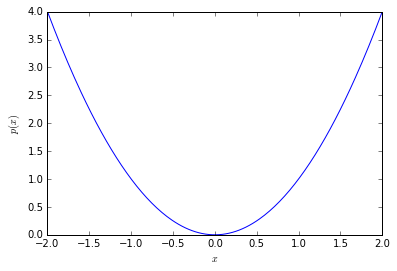

In [8]:
import matplotlib 
import matplotlib.pylab as plt

%matplotlib inline

def evalpol(a,x):
    if (len(a)==1):
        return a[0]
    else:
        return a[0] + x * evalpol(a[1:],x)
    
# Generate data to plot
px = np.linspace(min(x), max(x), 200)
py = evalpol(a,px)
print(py)

# Make plot
plt.plot(px, py)
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')


In [11]:
print(evalpol(a,np.array([-1,0,1])))

[ 1.  0.  1.]


In [18]:
print(evalpol(a,0))

0.0


In [19]:
print(evalpol(a,1))

1.0


__Exercício:__

1- Contrua uma função que receba como entrada os vetores x e y com n pontos, e retorne os coeficientes do polinômio que os interpola.

2- Verifique o seu algoritmo com os seguintes pontos de entrada:

In [28]:
x = np.linspace(-1,1,20)
y = np.sin(x)
print(x,y)

(array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]), array([-0.84147098, -0.78004444, -0.70998273, -0.63206143, -0.54714315,
       -0.45616793, -0.36014289, -0.26013102, -0.15723948, -0.05260728,
        0.05260728,  0.15723948,  0.26013102,  0.36014289,  0.45616793,
        0.54714315,  0.63206143,  0.70998273,  0.78004444,  0.84147098]))


In [29]:
def interpola(x,y):
    n = len(x)
    V = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            V[i,j] = x[i]**j
    a = np.linalg.solve(V,y)
    return a

a = interpola(x,y)
print(a)

[  1.11022302e-16   1.00000000e+00  -1.23953398e-15  -1.66666667e-01
   6.02411278e-14   8.33333333e-03  -9.35896383e-13  -1.98412693e-04
   7.18148815e-12   2.75569257e-06  -3.02201293e-11  -2.49042432e-08
   7.23157597e-11  -1.63752071e-10  -9.74565450e-11   4.08693020e-10
   6.85230064e-11  -2.74222700e-10  -1.94666815e-11   7.51319340e-11]


[ -4.31199230e+04  -3.55300071e+04  -2.92170740e+04  -2.39763736e+04
  -1.96343361e+04  -1.60440798e+04  -1.30815280e+04  -1.06420586e+04
  -8.63761693e+03  -6.99423317e+03  -5.64988943e+03  -4.55269179e+03
  -3.65930561e+03  -2.93361889e+03  -2.34560232e+03  -1.87033904e+03
  -1.48720028e+03  -1.17914632e+03  -9.32134977e+02  -7.34622032e+02
  -5.77140152e+02  -4.51944826e+02  -3.52717228e+02  -2.74315442e+02
  -2.12566659e+02  -1.64094001e+02  -1.26172561e+02  -9.66100235e+01
  -7.36479264e+01  -5.58802088e+01  -4.21862020e+01  -3.16756570e+01
  -2.36437759e+01  -1.75345352e+01  -1.29108649e+01  -9.43047682e+00
  -6.82633646e+00  -4.89093891e+00  -3.46369179e+00  -2.42082749e+00
  -1.66736745e+00  -1.13074561e+00  -7.55768534e-01  -5.00648271e-01
  -3.33893037e-01  -2.31880898e-01  -1.76975173e-01  -1.56067569e-01
  -1.59457573e-01  -1.79994958e-01  -2.12427161e-01  -2.52905407e-01
  -2.98613171e-01  -3.47488417e-01  -3.98017305e-01  -4.49082037e-01
  -4.99849466e-01  -5.49690181e-01

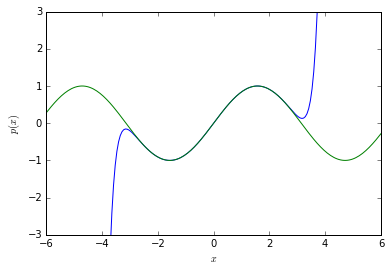

In [31]:
import matplotlib 
import matplotlib.pylab as plt

%matplotlib inline

def evalpol(a,x):
    if (len(a)==1):
        return a[0]
    else:
        return a[0] + x * evalpol(a[1:],x)
    
# Generate data to plot
px = np.linspace(-6.0, 6.0, 200)
py = evalpol(a,px)
print(py)

# Make plot
plt.plot(px, py, px, np.sin(px))
plt.ylim([-3.0,3.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')